<a href="https://colab.research.google.com/github/gustavoravel/data_science_portfolio/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

In this project, we will address the problem of credit card fraud, one of the main concerns of financial institutions such as banks and *fintechs*. In Brazil alone, about 12.1 million people have already been victims of some form of financial fraud in the past year. Translating into values, the financial scams exceeded the figure of R$ 1.8 billion in losses per year for the last 12 months.

<p align=center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1BXSIH-QWhAH5FZoXfrrL6lequ3AMD03nLQ&usqp=CAU" width="40%"></p>

Among these frauds, those involving credit cards are of great relevance since their non-detection will result in considerable losses, both for the consumer and financial institution.

Another factor to be considered is the amount of false positives, that is, those times when you tried to make a purchase and had your card blocked preventively - which probably caused stress and embarrassment.

## Collecting the Data

The data that we will use in this project has been made available by some European credit card companies. The dataset represents the financial transactions that took place in the period of two days, where 492 frauds were classified amid almost 290 thousand transactions.

As you can see, this is an extremely unbalanced data set, where fraud represents only 0.17% of the total.

Another interesting detail is that the *features* are all numeric, and were uncharacterized (due to problems related to privacy and security). Thus, column names are represented by $ [V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://loyaltylobby.com/wp-content/uploads/2020/03/Credit-Cards-1-scaled.jpeg" width="40%"></p>

[On the original data page](https://www.kaggle.com/mlg-ulb/creditcardfraud), it is also reported that the variables underwent a transformation known as Principal Component Analysis (PCA).

PCA allows the reduction of dimensionality while maintaining as much information as possible. To achieve this, the algorithm finds a new set of resources - the so-called **components**.

These components are less than or equal to the original variables. In the case of this project, the components found by the transformation of the PCA are the columns themselves $[V1, V2, V3 \dots, V28]$.

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error as MSE, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

In [3]:
#load data
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

With the data imported into a *Dataframe* structure - and without the need for any further adjustment or configuration at this stage, an exploratory analysis of the data can be started in order to prepare a *Machine Learning* model.

In [5]:
#see entries
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


When starting our exploratory analysis, we found dozens of variables named with an initial V and values that are certainly confusing. As previously explained, they underwent a Principal Compensation Analysis (the Dataset was probably much larger than what we are seeing, but with some variables that did not help in target prediction) and many of these V variables are standardized or normalized. This means that the values present in these variables have been converted into a representation that is more suitable for the estimators (*machine learning* models).

See below in the statistical description that these numbers are within a scale (do not escape a minimum or maximum limit)

In [7]:
#describe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Another important factor of our dataset is that it is complete (it has no missing values). If there were, we couldn't use them in our machine learning model (they don't work well with missing values).

In [8]:
#missing values
df.isnull().sum().max()

0

Moving on to graphical analysis, we need to start with information on how balanced our data is. Note that with the plot below, we have very little information as to when a transaction was defrauded (only 492), for a total of more than 250 thousand registered transactions.

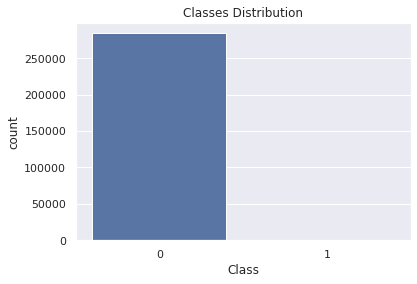

0    284315
1       492
Name: Class, dtype: int64


In [9]:
#plots
sns.countplot(x='Class', data=df)
plt.title('Classes Distribution')
plt.show()
print(df['Class'].value_counts())

In addition to balancing, it is important to note the distribution of data, and in this case, we will see how the variable `Time` and its respective `Class` are distributed.

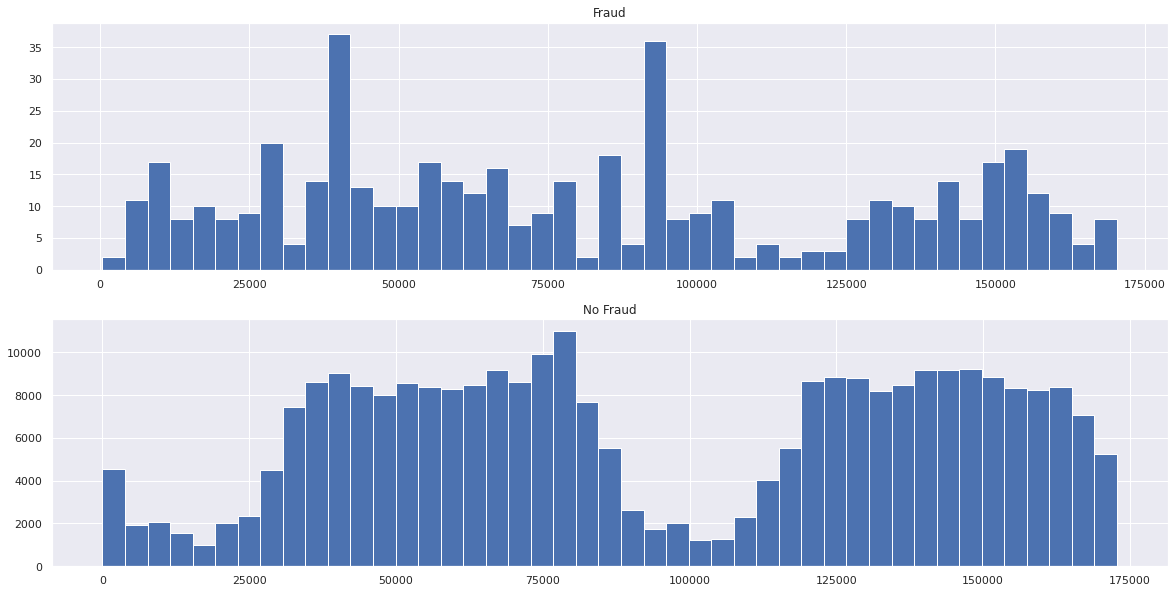

In [10]:
#hist plot
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].hist(df['Time'][df['Class'] == 1], bins=45)
ax[0].set_title('Fraud')
ax[1].hist(df['Time'][df['Class'] == 0], bins=45)
ax[1].set_title('No Fraud')
plt.show()

Note that for fraudulent distribution we have a bimodal type. Easier to identify by having less data. The opposite of non-fraudulent distribution, where the large amount of data gives us an idea of the density of the distribution.

However, in this type of case, it is more practical to use ECDF graphs, as an empirical distribution function. More details on how to read an ECDF chart you can find in this [article](https://ravelsoares-lima.medium.com/entendendo-a-fun%C3%A7%C3%A3o-de-distribui%C3%A7%C3%A3o-acumulada-emp%C3%ADrica-ecdf-70d7393544ee) (in Portuguese).

In [11]:
#ecdf function
def ecdf(data):
  n = len(data)
  x = np.sort(data)
  y = np.arange(1, n+1) / n
  return x, y

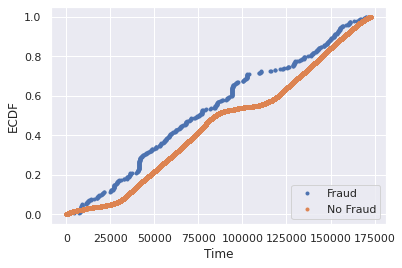

In [12]:
#ecdf plot
xfraud, yfraud = ecdf(df['Time'][df['Class'] == 1])
xnofraud, ynofraud = ecdf(df['Time'][df['Class'] == 0])

plt.plot(xfraud, yfraud, marker='.', linestyle = 'none')
plt.plot(xnofraud, ynofraud, marker='.', linestyle = 'none')

plt.legend(('Fraud', 'No Fraud'), loc='lower right')
plt.xlabel('Time')
plt.ylabel('ECDF')

plt.show()

Note that with greater clarity, fraudulent transactions have a longer time than the number of non-fraudulent ones with respect to the percentage itself.


*   Time of 50000 represent 20% of non-fraudulent data, while fraudulent data represent 35%.
*   Time of 100000 represent for 55% of non-fraudulent data, while fraudulent data account for 70%.
*   Time of 150000 represent for 83% of non-fraudulent data, while fraudulent data account for 89%.



#### Outliers or just points outside the IQR?

When plotting a boxplot, it is common to find points outside the curve. However, in certain data sets, we found very small boxes with several points accused as outliers.

This is because of the sample size. Let's put it in context: The IQR (Inter Quartile Range) is based on central trend analysis (mean, fashion and median). A normal distribution does not generate any extreme value. However, the number of extreme values will increase simultaneously with the sample size and the IQR estimates narrow, which would be expected given the central limit theorem (when the sample size increases, the sample distribution of its mean approaches more and more of a normal distribution). That is, detecting outiliers is already a problem, as they are characterized as such because they are out of a metric without distribution at the extremes close to the IQR.

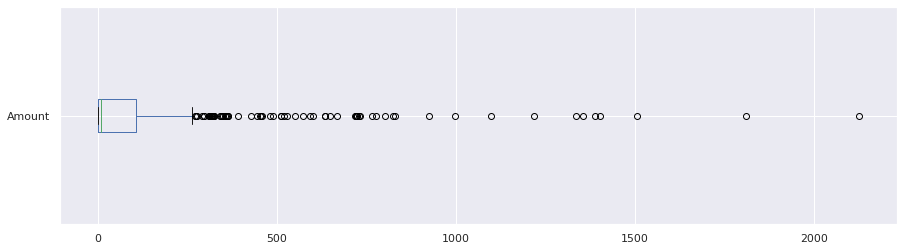

In [13]:
#boxplot
df['Amount'][df['Class'] == 1].plot(kind='box', figsize=(15, 4), vert=False)
plt.show()

As the graphic above proves. Regardless of whether they are outliers or not, we should standardize them in order to fit our classification model, right ahead. Some models are sensitive to outliers (Logistic Regression) and others are not (Decision Trees).

To advance the behavior of our regressions, let's analyze the correlation between the data a little. When associating a dependent variable with an independent one, Regression maps the behavior of one variable during the variation of another variable.

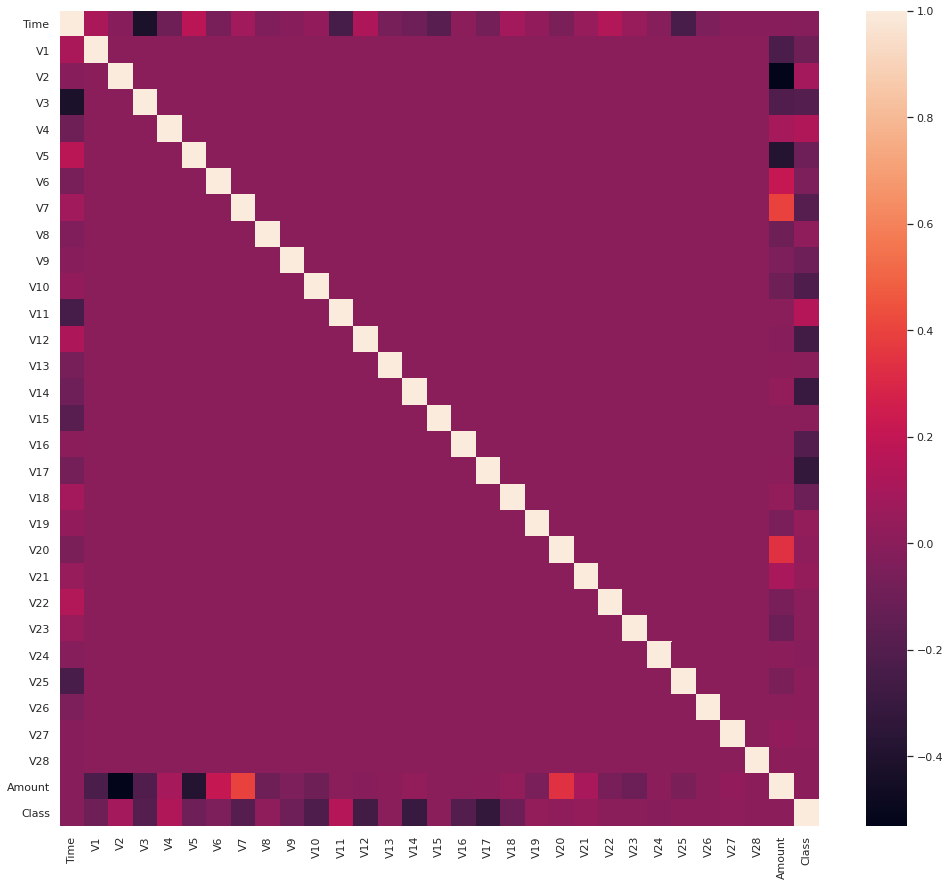

In [14]:
#corr
fig, ax = plt.subplots(figsize=(17, 15))
sns.heatmap(df.corr(), ax=ax)
plt.show()

What does Pearson tell us? The correlation between two variables is measured on a scale of -1 to 1, where:

*   Closer to 1: perfect positive correlation - one variable increases as the other increases;
*   Closer to -1: perfect negative correlation - one variable increases as the other decreases;
*   0: there is no linear correlation.

Note that in the graph above, the variables V do not correlate. Perhaps because of its normalization. But note that they have an impact on the `Time`, `Amount` and `Class` variables, important variables for our analysis.



## Data Preparation


Before we continue with the estimators, we also need to normalize the `Time` and` Amount` variables.

This normalization will happen with the so-called `z_score`. Where the observation is subtracted by the mean and divided by the standard deviation (z = (x - u) / s). An account that basically calculates how many standard deviations the observation is far from the average. The `z_score` basically transforms the sample into a normal distribution, with a mean of 0 and standard deviation 1.

In [15]:
scaler = StandardScaler()
df['std_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['std_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df_std = df.drop(['Time', 'Amount'], axis=1)

Soon after, we will distribute our data set between *Features* and *Target*, and guarantee the repetition of random values.

In [16]:
X = df_std.drop('Class', axis=1)
y = df_std['Class']
#seed for reproducibility
SEED = 1

It is important to distribute the *Features* and *Target* in pieces of Training (making our algorithm "learn" the patterns) and Test (testing the precision and accuracy of the algorithm)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.25, 
                                                    random_state= SEED, 
                                                    stratify=y)

## Machine Learning Model


The initial objective was to use a "Voting Classifier", where we tested several models and the voter chooses the model with the highest score. However, for this analysis, we will not choose the model with the best precision. Later on, in the evaluation of the model, we will explain why.

In [18]:
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)

classifiers = [('Logistic Regression', lr),
               ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt)]

In [19]:
for clf_name, clf in classifiers:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('{:s} Accuracy: {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
  print('{:s} MSE: {:.3f}'.format(clf_name, MSE(y_test, y_pred)))
  print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Accuracy: 0.999
Logistic Regression MSE: 0.001
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.71      0.79       123

    accuracy                           1.00     71202
   macro avg       0.95      0.85      0.90     71202
weighted avg       1.00      1.00      1.00     71202

K Nearest Neighbours Accuracy: 1.000
K Nearest Neighbours MSE: 0.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.92      0.84      0.88       123

    accuracy                           1.00     71202
   macro avg       0.96      0.92      0.94     71202
weighted avg       1.00      1.00      1.00     71202

Classification Tree Accuracy: 0.999
Classification Tree MSE: 0.001
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.71      0.83 

## Evaluate Model Performance




When analyzing the classifiers above, we can see that they are practically addicted. This is due to the amount of training data in Class 0 of our *Target*. Something called class imbalance. Very common in spam recognition, credit card fraud (as in our project). The classifier technically memorizes the Class 0 data, failing in its original purpose, to identify possible Class 1.

#### Confusion Matrix

The confusion matrix crosses our predictions with the actual data, indicating the number of errors and hits in both classes.

<img src='https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png' width="400" height="300">

The confusion matrix presents us with the following metrics with the following calculations:

<img src='https://www.researchgate.net/profile/Rune_Jacobsen2/publication/334840641/figure/fig3/AS:794222751928321@1566368868347/Confusion-matrix-and-evaluation-metrics.png' width="500" height="300">

For our analysis we will use *Recall* (TP / (TP + FN)), because by including false positives in the calculation, we are measuring what should be counted as fraud and it was not. A high *Recall* means the amount of fraud counted correctly. So our champion model was KNN (Knearest Neighbors), with a 0,84 *Recall* in Class 1.

But there is something important to note, as we use several rating models. With a *Recall* of 0.83, very close to the KNN, our Classification Tree blesses us with a worthy attribute: the *feature importance*. Let's see with our own eyes:

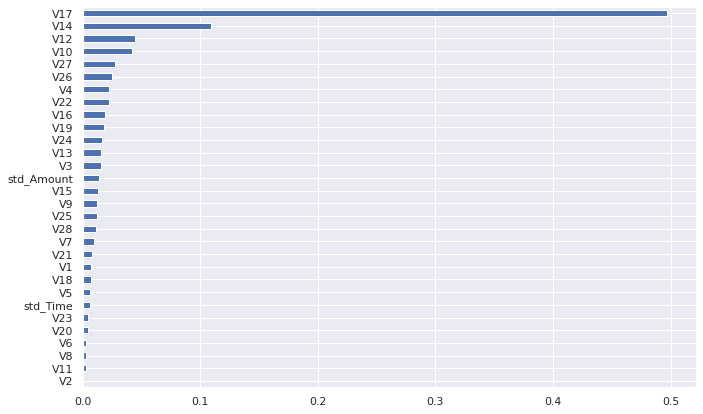

In [21]:
#feature importance
importances_dt = pd.Series(dt.feature_importances_, index=X.columns)
sorted_importances_dt = importances_dt.sort_values()
sorted_importances_dt.plot(kind='barh', figsize=(11, 7))
plt.show()

We don't know what it is, but we now know that `V17` represents half the importance among all the variables used in the classification model.

## Conclusion

Investment in the area of fraud detection through Artificial Intelligence has been growing every year, representing a great opportunity in *Data Science*.

With large volumes of data as a historical basis, a *machine learning* algorithm just a little better than the previous ones already represents savings of millions of Reais. And that is the challenge, to increasingly improve the use of algorithms to inhibit or prevent fraudulent transactions.

Therefore, the more data we have, the more easily the algorithms learn. This does not mean to defend increasing fraud cases, but to explore the nuances of *machine learning* in financial security.